<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_16/CS166_PCW_Session_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

Always bet heads, each time betting $12.5.

This is because:
1. We are statistically more likely to win back the money and make an average of: $250 * 0.2 = $50
2. We spread out the risks of losing all our money (we are guaranteed to have enough money to play until the final round).
3. Psychologically, this is a good strategy because we don't gamble too much (not a lot of thrills when we win - only get $25, but not a lot of pain either).

## Task 2
For one of the bet I accidentally wrote 12.3 instead of 12.5 hence the changes.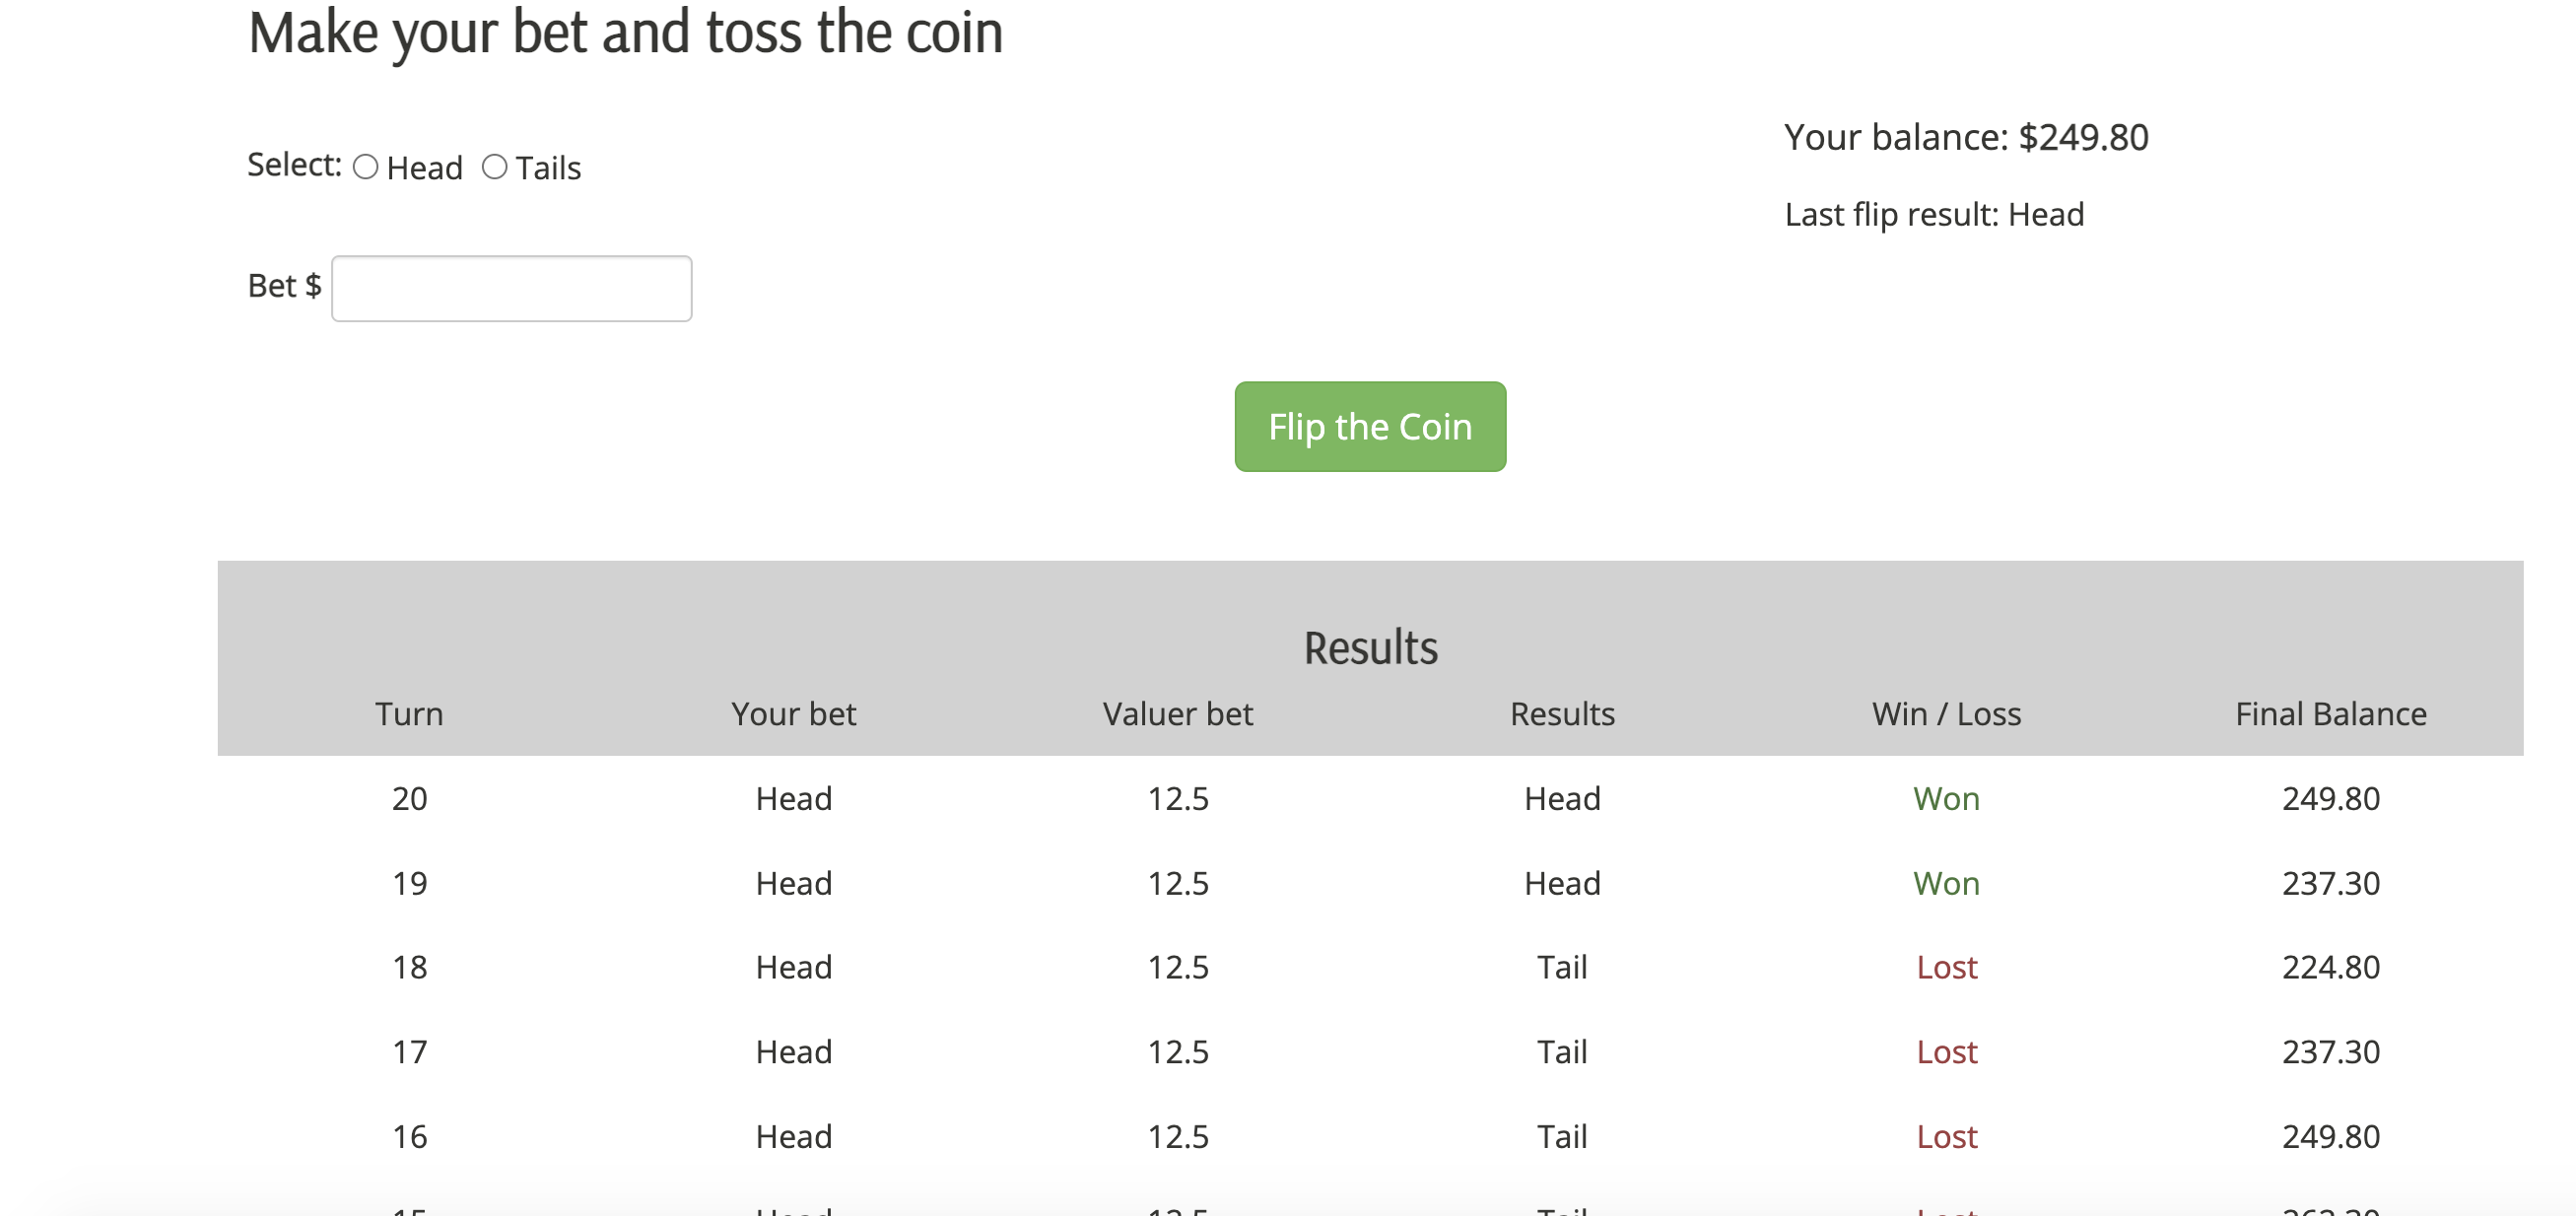

(296.2786659135864, 303.02133408641356)

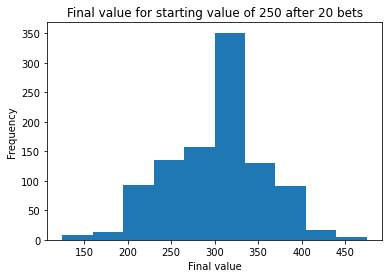

In [7]:
import random
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


repeats = 1000
no_of_bets = 20
coin_bias = 0.6
initial_value = 250
bet_values = [initial_value/ no_of_bets for _ in range(no_of_bets)]
bets = ["H" for _ in range(no_of_bets)]

def simulate_game(repeats = repeats, no_of_bets = no_of_bets, coin_bias = coin_bias, bet_values = bet_values, initial_value = initial_value, bets = bets):
    returns = []
    for _ in range(repeats):
        final_val = initial_value
        for i in range(no_of_bets):
            if final_val < bet_values[i]:
                #run out of money
                break
            coin = "H" if random.random() < coin_bias else "T"
            correct = 1 if coin == bets[i] else -1
            final_val += bet_values[i] * correct
            
        returns.append(final_val)
    
    plt.hist(returns)
    plt.xlabel("Final value")
    plt.ylabel("Frequency")
    plt.title(f"Final value for starting value of {initial_value} after {no_of_bets} bets")
    confidence_interval = st.t.interval(alpha=0.95, df=len(returns)-1, loc=np.mean(returns), scale=st.sem(returns)) 
    return confidence_interval


simulate_game()

            


This seems to be a pretty good strategy because our 95% confidence interval is around (296.27, 303.02) so we pretty likely to make $50.